<a href="https://colab.research.google.com/github/Vaisakh-Babu/pandas_practice/blob/master/covid19data_practice_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Covid-19 data of United States
###Trying to Analyse the covid-19 data which is available at 
https://github.com/PayneLab/covid19pandas

In [1]:
! pip install covid19pandas

In [2]:
import covid19pandas as cvd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = cvd.get_data_nyt()

These data were obtained from The New York Times (https://github.com/nytimes/covid-19-data).


In [4]:
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
4629,2020-05-25,Virginia,51,37727,1208
4630,2020-05-25,Washington,53,21005,1076
4631,2020-05-25,West Virginia,54,1782,73
4632,2020-05-25,Wisconsin,55,15646,514


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4634 entries, 0 to 4633
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4634 non-null   datetime64[ns]
 1   state   4634 non-null   object        
 2   fips    4634 non-null   int64         
 3   cases   4634 non-null   int64         
 4   deaths  4634 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 181.1+ KB


####The given data is cumulative
####We will try to create columns for daily data

In [0]:
df = cvd.calc_daily_change(df, 'cases','state')
df['daily_deaths'] = cvd.calc_daily_change(df,'deaths',"state")["daily_deaths"]

In [7]:
df

,date,state,fips,cases,deaths,daily_cases,daily_deaths
0,2020-01-21,Washington,53,1,0,1,0
1,2020-01-22,Washington,53,1,0,0,0
2,2020-01-23,Washington,53,1,0,0,0
3,2020-01-24,Illinois,17,1,0,1,0
4,2020-01-24,Washington,53,1,0,0,0
...,...,...,...,...,...,...,...
4629,2020-05-25,Virginia,51,37727,1208,1483,37
4630,2020-05-25,Washington,53,21005,1076,273,7
4631,2020-05-25,West Virginia,54,1782,73,11,1
4632,2020-05-25,Wisconsin,55,15646,514,284,4


In [0]:
ny = df.query("state == 'New York'")

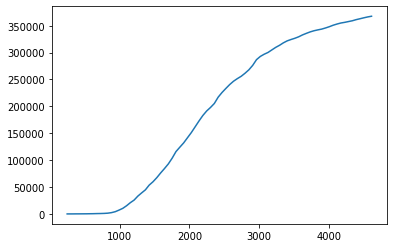

In [9]:
ny.cases.plot(kind = 'line')

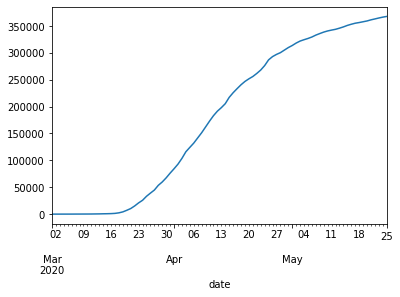

In [10]:
ny.set_index('date').cases.plot(kind = 'line')

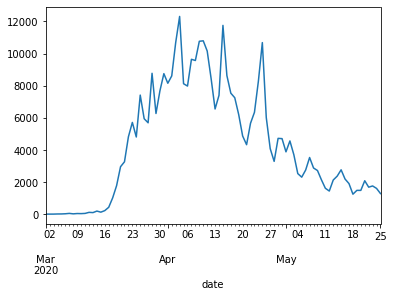

In [11]:
ny.set_index('date').daily_cases.plot(kind = 'line')

In [12]:
df.groupby('state')['cases'].max()

state
Alabama                      14986
Alaska                         412
Arizona                      16561
Arkansas                      6029
California                   97017
Colorado                     24256
Connecticut                  40873
Delaware                      8965
District of Columbia          8225
Florida                      51738
Georgia                      41414
Guam                          1135
Hawaii                         637
Idaho                         2664
Illinois                    112248
Indiana                      32489
Iowa                         17628
Kansas                        9272
Kentucky                      8899
Louisiana                    37916
Maine                         2074
Maryland                     47754
Massachusetts                93271
Michigan                     54816
Minnesota                    21324
Mississippi                  13458
Missouri                     12296
Montana                        479
Nebraska      

In [13]:
df.groupby('state')['cases'].max().sort_values()

state
Northern Mariana Islands        22
Virgin Islands                  69
Alaska                         412
Montana                        479
Hawaii                         637
Wyoming                        843
Vermont                        962
Guam                          1135
West Virginia                 1782
Maine                         2074
North Dakota                  2457
Idaho                         2664
Puerto Rico                   3260
Oregon                        3949
New Hampshire                 4197
South Dakota                  4586
Arkansas                      6029
Oklahoma                      6090
New Mexico                    7026
Nevada                        7959
District of Columbia          8225
Utah                          8521
Kentucky                      8899
Delaware                      8965
Kansas                        9272
South Carolina               10178
Missouri                     12296
Nebraska                     12355
Mississippi   

In [14]:
! pip install plotly

In [15]:
df.groupby('fips')['cases'].max().sort_values()

fips
69        22
78        69
2        412
30       479
15       637
56       843
50       962
66      1135
54      1782
23      2074
38      2457
16      2664
72      3260
41      3949
33      4197
46      4586
5       6029
40      6090
35      7026
32      7959
11      8225
49      8521
21      8899
10      8965
20      9272
45     10178
29     12296
31     12355
28     13458
44     14065
1      14986
55     15646
4      16561
19     17628
47     20533
53     21005
27     21324
37     23997
8      24256
39     32477
18     32489
51     37727
22     37916
9      40873
13     41414
24     47754
12     51738
26     54816
48     56490
42     72356
25     93271
6      97017
17    112248
34    155092
36    367625
Name: cases, dtype: int64

In [16]:
   df.groupby('fips')['cases'].max().sort_values().to_frame()

,cases
fips,
69,22
78,69
2,412
30,479
15,637
56,843
50,962
66,1135
54,1782


In [0]:
state_dataset = df.groupby('state')['cases'].max().sort_values().to_frame().reset_index()

In [18]:
state_dataset

,state,cases
0,Northern Mariana Islands,22
1,Virgin Islands,69
2,Alaska,412
3,Montana,479
4,Hawaii,637
5,Wyoming,843
6,Vermont,962
7,Guam,1135
8,West Virginia,1782
9,Maine,2074


Population is high in New York state. That can be the reason for high number of cases.
New Jersey is neighbouring state of NY. Hence the high number of cases.
Massachusetts, California, Illinois, etc. have many universities and have cities which have visitors from around the world, Which can be the reason for increased number of cases.
On the other hand sates like Northern Mariana Islands, Virgin Islands, Alaska, Montana, Hawaii, etc. are isolated states and less commutation from other places, which can be a reason for comparitively less number of cases.

In [0]:
fips_dataset = df.groupby('fips')['cases'].max().sort_values().to_frame().reset_index()

In [19]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

In [0]:
import matplotlib.pyplot as plt

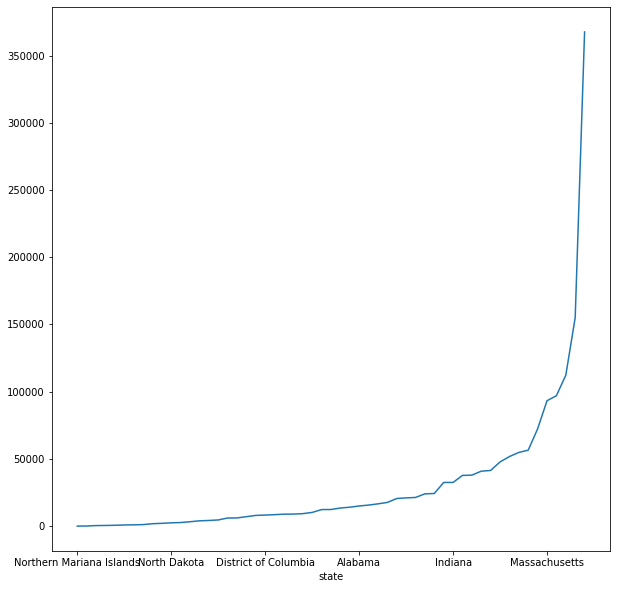

In [39]:
plt.figure(figsize = (10,10))
state_dataset.set_index('state').cases.plot()
plt.show()

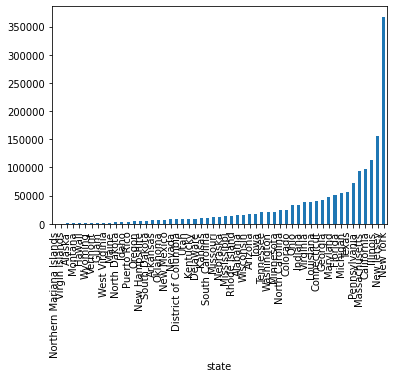

In [41]:
state_dataset.set_index('state').cases.plot(kind = 'bar')

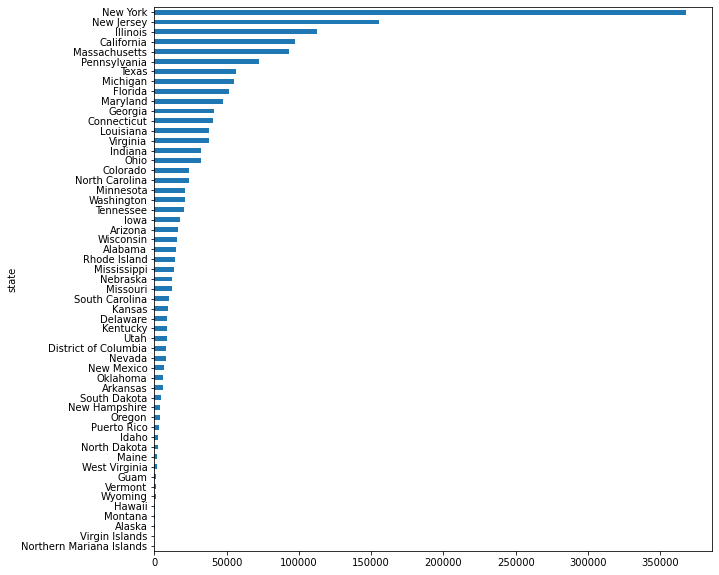

In [42]:
plt.figure(figsize = (10,10))
state_dataset.set_index('state').cases.plot(kind = 'barh')
plt.show()